# Importing Libraries


In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Downloading Data

For this exercise, we will be using the Poe dataset. This dataset is composed of the word frequency of texts written by different authors and one text that is written by an unknown author. It is beleived to be the case that this work was written by Poe, but the purpose of this exercise is to either prove or disprove that hypothesis.

In [2]:
import csv
import re

# name of file
filename = "corpusTop50words.csv"

# read in csv
pdf = pd.read_csv(filename, index_col=0)

# for our dataset, we have two rows "Total" and "Average", which should be removed before analysis
pdf = pdf.drop(["Total","Average"])

X = pdf.to_numpy()
#X = pdf[[]].values
#y = pdf.shape[0]
y = []
for row in pdf.index:
    y.append(re.sub("_.+","",row))

y = pd.DataFrame(y)
#y = y.to_numpy()


# Preprocessing Data

The next step is to remove any categorical values from our dataframe. This is because scikit learn does not handle these values well, so we will use labelEncoder() to accomplish this

In [3]:
# N/A

# Set up Decision Tree

We now need to create the splits for the decision tree.

In [25]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.18, random_state=3)

print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(y_testset.shape))


Shape of X training set (70, 40) &  Size of Y training set (70, 1)
Shape of X testing set (16, 40) &  Size of Y testing set (16, 1)


In [26]:
poeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 60)
poeTree # it shows the default parameters

poeTree.fit(X_trainset,y_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=60)

# Prediction Time

In [27]:
predTree = poeTree.predict(X_testset)

print (predTree [10:15])
print (y_testset [10:15])

['Poe' 'Edgeworth' 'Lytton' 'Southey' 'Bird']
            0
50    Lippard
25  Edgeworth
54     Lytton
12    Bowring
8        Bird


# Evaluation

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.5


# Visualization

In [29]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

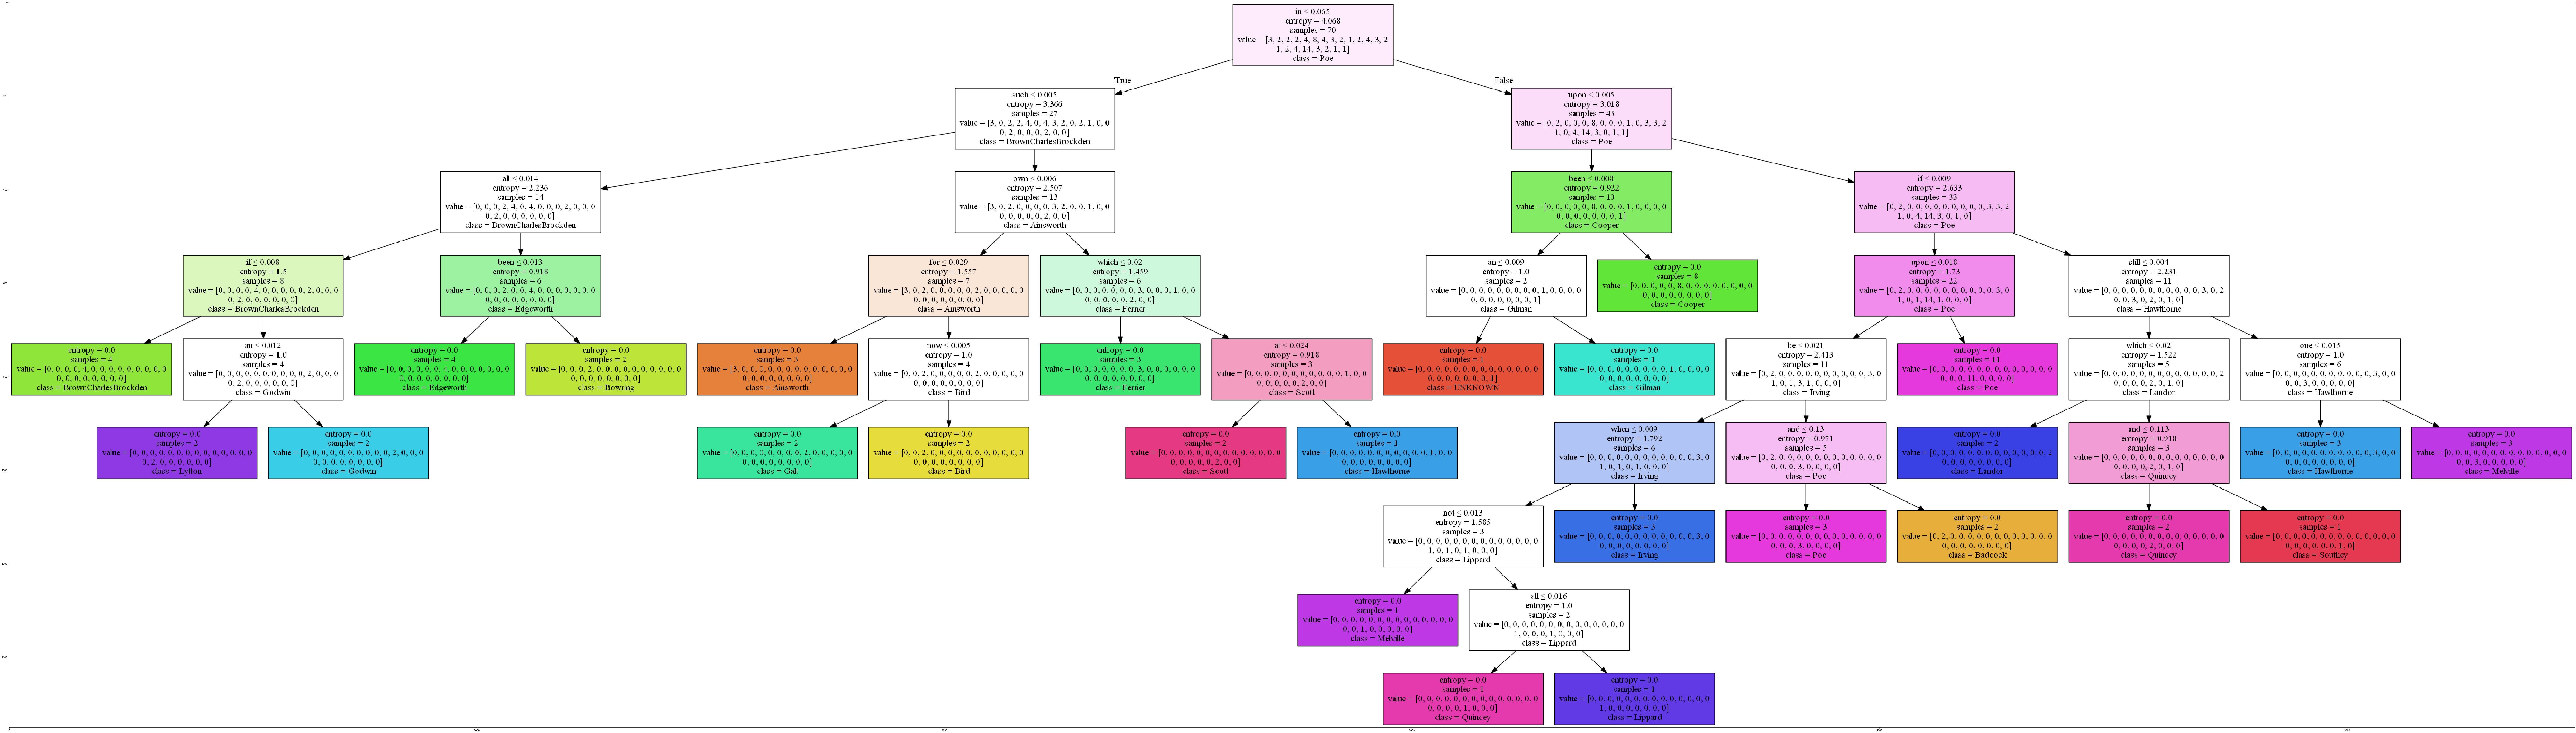

In [30]:
dot_data = StringIO()
filename = "poeTree2_test.png"
featureNames = pdf.columns[0:40]
#out=tree.export_graphviz(poeTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
out=tree.export_graphviz(poeTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 400))
plt.imshow(img,interpolation='nearest')